# Multimodal Coding Demo
This notebook demonstrates three key capabilities of Qwen3-VL:

1. **Image to HTML**: Convert screenshots or sketches into functional HTML code
2. **Chart to Code**: Analyze chart images and generate corresponding plotting code  
3. **Multimodal Coding Challenges**: Solve programming problems that require visual understanding

In [ ]:
# Please put your provider API key here
OPENAI_API_KEY = "Put your key here"

In [ ]:
# Import required libraries
import os
import json
import base64
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from openai import OpenAI
from IPython.display import HTML, display, Markdown

client = OpenAI(
    base_url="https://dashscope-intl.aliyuncs.com/compatible-mode/v1",
    api_key=OPENAI_API_KEY
)

def encode_image(image_path):
    """Encode image to base64 for OpenAI API"""
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')

def convert_base64_to_pil_image(base64_str: str) -> Image:
    """Convert base64 string to PIL Image"""
    image_data = base64.b64decode(base64_str)
    image = Image.open(BytesIO(image_data))
    return image

def show_image(image_path, max_width=1000):
    """Display image in notebook with size control"""
    img = Image.open(image_path)
    if img.width > max_width:
        ratio = max_width / img.width
        new_height = int(img.height * ratio)
        img = img.resize((max_width, new_height))
    display(img)

def show_pil_image(pil_image, max_width=1000):
    """Display PIL image in notebook with size control"""
    img = pil_image.copy()
    if img.width > max_width:
        ratio = max_width / img.width
        new_height = int(img.height * ratio)
        img = img.resize((max_width, new_height))
    display(img)

print("✅ Setup complete!")

✅ Setup complete!


In [3]:
def extract_last_code_block(text):
    """Extract the last named markdown code block from the text"""
    import re
    code_blocks = re.findall(r"```(?:python|html)(.*?)```", text, re.DOTALL)
    if code_blocks:
        return code_blocks[-1].strip()
    return None

## 1. Image-to-HTML Conversion

Let's start by converting a hand-drawn sketch into functional HTML. We'll use a simple sketch and ask Qwen3-VL-235A22 to generate clean, modern HTML code.

Input image:


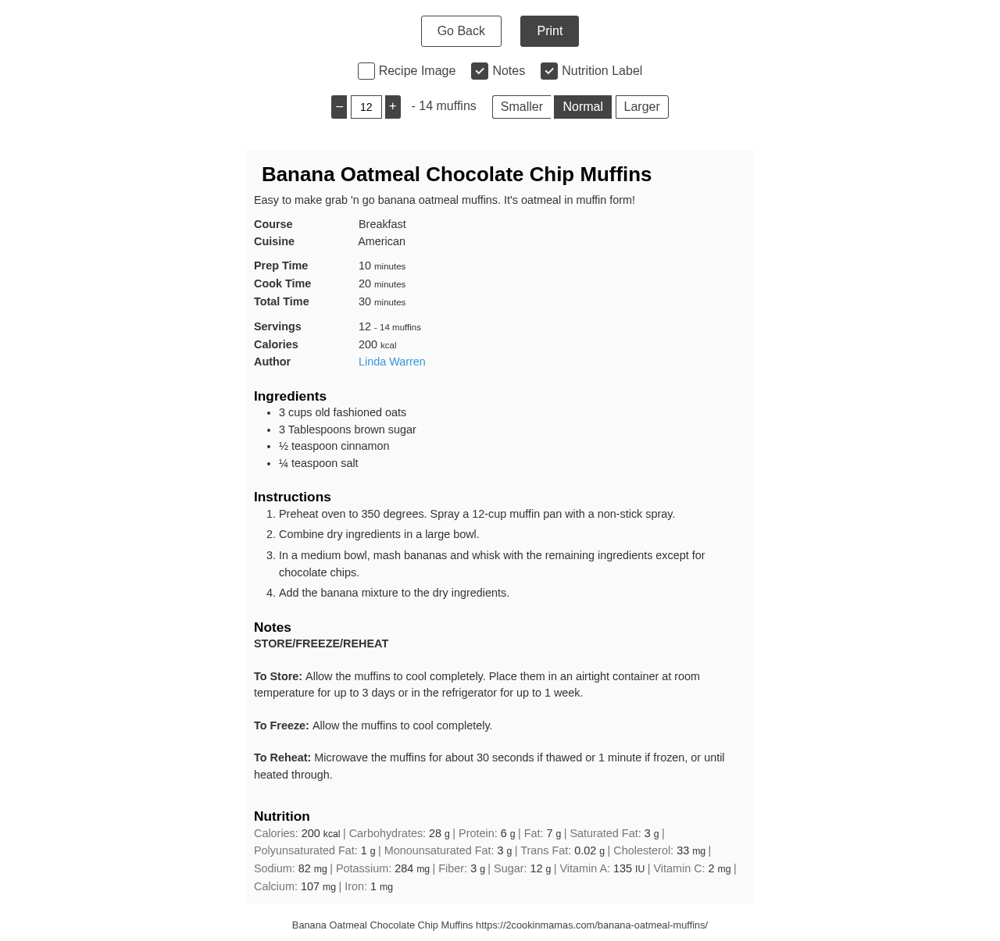


Generated HTML:
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Banana Oatmeal Chocolate Chip Muffins</title>
    <style>
        body {
            font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
            line-height: 1.6;
            color: #333;
            max-width: 800px;
            margin: 0 auto;
            padding: 20px;
            background-color: #f9f9f9;
        }
        
        .header {
            display: flex;
            justify-content: center;
            gap: 20px;
            margin-bottom: 20px;
            flex-wrap: wrap;
        }
        
        .btn {
            padding: 8px 16px;
            border: 1px solid #ccc;
            border-radius: 4px;
            cursor: pointer;
            font-weight: 500;
            transition: background-color 0.2s;
        }
        
        .btn-primary {
            background-color: #4a4a4a

In [ ]:
# Display the sketch image
# You can also try converting a screenshot back to HTML
input_image_path = "assets/multimodal_coding/screenshot_demo.png"
# input_image_path = "assets/multimodal_coding/sketch2code_input.jpeg"
print("Input image:")
show_image(input_image_path)

def sketch_to_html(image_path):
    """Convert sketch to HTML using Qwen3-VL-235A22"""
    base64_image = encode_image(image_path)
    
    response = client.chat.completions.create(
        model="qwen3-vl-235b-a22b-instruct",
        messages=[
            {
                "role": "user",
                "content": [
                    {
                        "type": "image_url",
                        "image_url": {
                            "url": f"data:image/jpeg;base64,{base64_image}"
                        }
                    },
                    {
                        "type": "text",
                        # Feel free to modify the prompt to get different styles of HTML
                        "text": """Analyze this screenshot and convert it to clean, functional and modern HTML code. """
                    },
                ]
            }
        ],
        max_tokens=16384,
        temperature=0.8,
    )
    
    response_text = response.choices[0].message.content
    code = extract_last_code_block(response_text)
    if code is None:
        raise ValueError("No code block found in the response.")
    return code

# Generate HTML from sketch
html_code = sketch_to_html(input_image_path)
print("\n" + "="*50)
print("Generated HTML:")
print("="*50)
print(html_code)

In [14]:
# Save the generated HTML to a file
output_html_path = "image2code_output.html"
with open(output_html_path, "w") as f:
    f.write(html_code)

# You can open the generated HTML file in a browser to see the result

(Optional) The following block install playwright to take a clean screenshot of the generated page. You may need sudo to install the dependencies.

In [ ]:
!pip install playwright
!playwright install-deps
!playwright install chromium

Screenshot of the generated webpage:


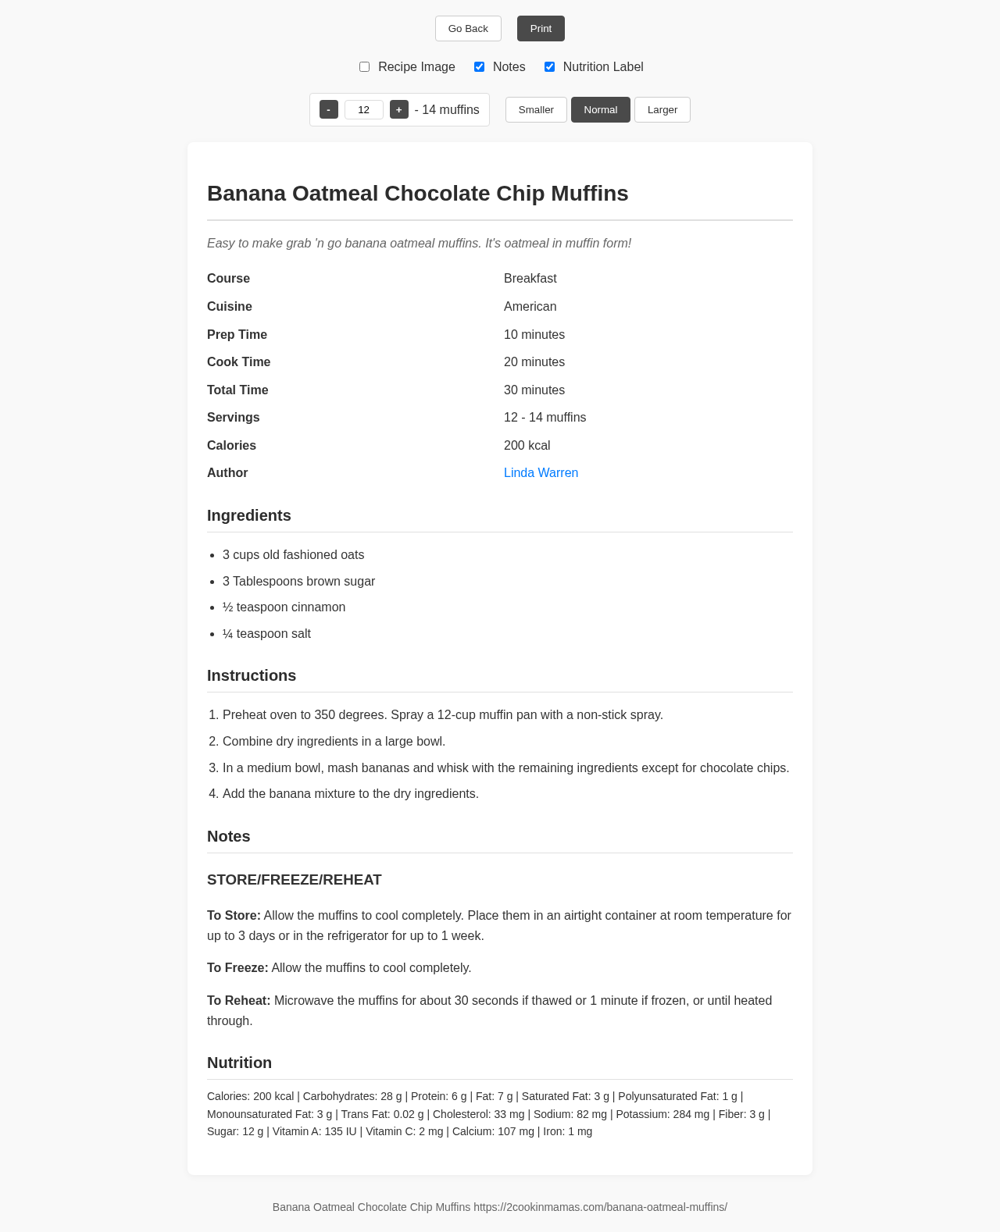

In [15]:
# Call take_screenshot.py to take a screenshot of the generated HTML
os.system(f"python utils/multimodal_coding/take_screenshot.py --html {output_html_path} --png webpage_screenshot.png")

print("Screenshot of the generated webpage:")
show_image("webpage_screenshot.png")

## 2. Chart-to-Code

Now let's analyze a chart image and generate the corresponding matplotlib code to recreate it using Qwen3-VL.

Input chart:


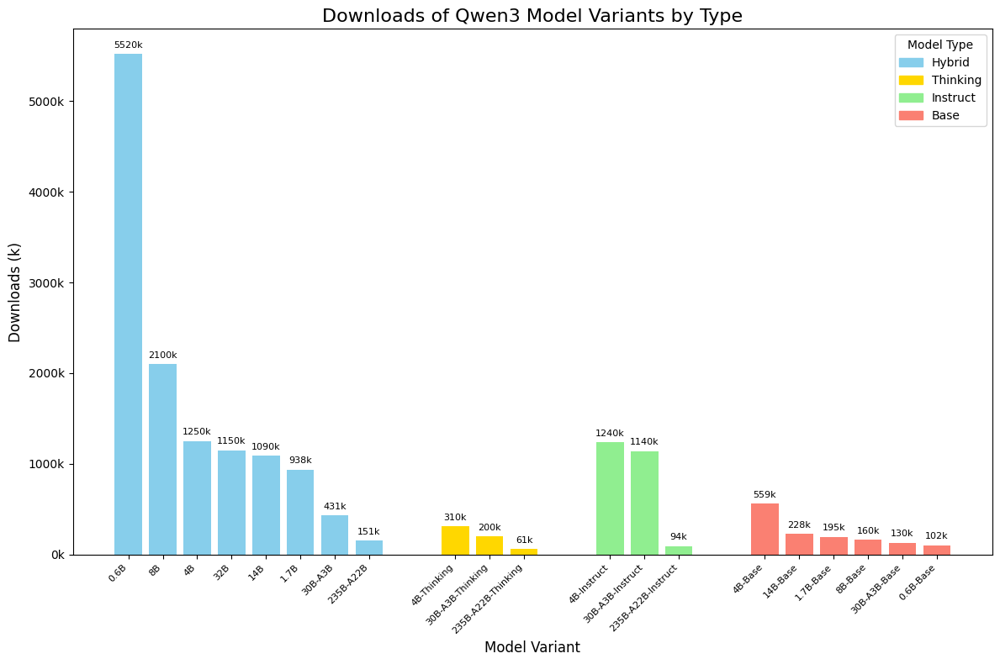


Generated Matplotlib Code:
import matplotlib.pyplot as plt

# Data for the bar chart
model_variants = [
    "0.6B", "8B", "4B", "32B", "14B", "1.7B", "30B-A3B", "235B-A22B",
    "4B-Thinking", "30B-A3B-Thinking", "235B-A22B-Thinking",
    "4B-Instruct", "30B-A3B-Instruct", "235B-A22B-Instruct",
    "4B-Base", "14B-Base", "1.7B-Base", "8B-Base", "30B-A3B-Base", "0.6B-Base"
]
downloads = [
    5520, 2100, 1250, 1150, 1090, 938, 431, 151,
    310, 200, 61,
    1240, 1140, 94,
    559, 228, 195, 160, 130, 102
]
model_types = [
    "Hybrid", "Hybrid", "Hybrid", "Hybrid", "Hybrid", "Hybrid", "Hybrid", "Hybrid",
    "Thinking", "Thinking", "Thinking",
    "Instruct", "Instruct", "Instruct",
    "Base", "Base", "Base", "Base", "Base", "Base"
]

# Define colors for each model type
colors = {
    "Hybrid": "#87CEEB",
    "Thinking": "#FFD700",
    "Instruct": "#90EE90",
    "Base": "#FF6347"
}

# Create the bar chart
plt.figure(figsize=(14, 8))

# Plot bars with corresponding colors
for i, vari

In [ ]:
# Display the chart image
chart_path = "chart2code_input.png"
print("Input chart:")
show_image(chart_path)

def chart_to_matplotlib(image_path):
    """Convert chart to matplotlib code using Qwen3-VL-235A22"""
    base64_image = encode_image(image_path)
    
    response = client.chat.completions.create(
        model="qwen3-vl-235b-a22b-instruct",
        messages=[
            {
                "role": "user",
                "content": [
                    {
                        "type": "text",
                        "text": """Convert this chart image to Python matplotlib code that can reproduce the chart."""
                    },
                    {
                        "type": "image_url",
                        "image_url": {
                            "url": f"data:image/png;base64,{base64_image}"
                        }
                    }
                ]
            }
        ],
        max_tokens=16384,
        temperature=0.8
    )
    
    response_text = response.choices[0].message.content
    code = extract_last_code_block(response_text)
    if code is None:
        raise ValueError("No code block found in the response.")
    return code

# Generate matplotlib code from chart
matplotlib_code = chart_to_matplotlib(chart_path)
print("\n" + "="*50)
print("Generated Matplotlib Code:")
print("="*50)
print(matplotlib_code)

Executing generated code...


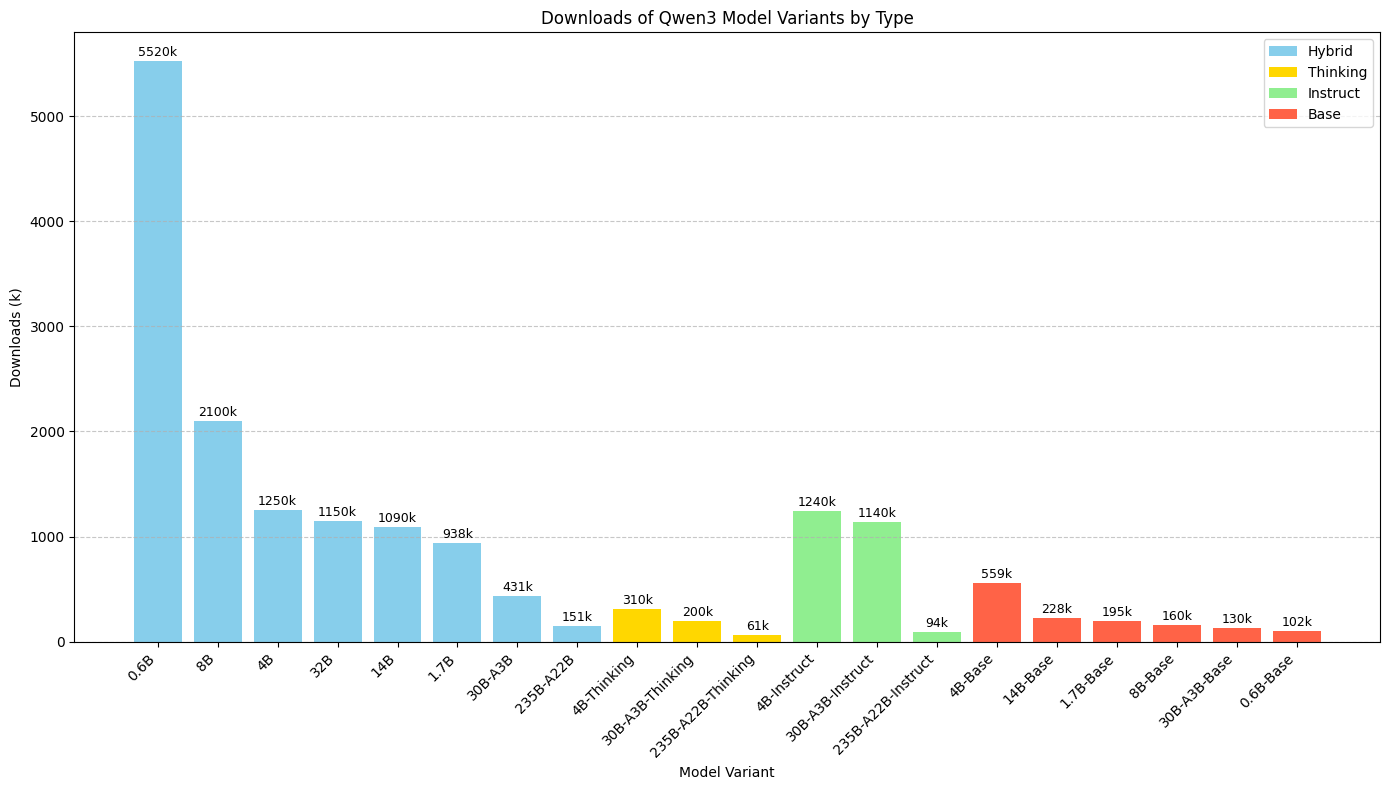

In [ ]:
# Execute the generated matplotlib code
# =====================================
ALLOW_DANGEROUS_CODE = False # Set to True to enable execution
# =====================================
print("Executing generated code...")
try:
    if not ALLOW_DANGEROUS_CODE:
        raise RuntimeError("Execution of generated code is disabled for safety. Set ALLOW_DANGEROUS_CODE = True to enable.")
    # Execute the generated code
    exec(matplotlib_code)
    plt.show()
except Exception as e:
    print(f"Error executing code: {e}")
    print("You may need to adjust the generated code slightly.")

## 3. Multimodal Coding Challenges

[MMCode](https://github.com/likaixin2000/MMCode) is a benchmark for evaluating multimodal programming problems. Let's download the test set and try solving some problems with the powerful Qwen3-VL.

In [ ]:
# Download and load MMCode test set
import gzip
import urllib.request

def download_mmcode_testset():
    """Download MMCode test set from HuggingFace"""
    url = "https://huggingface.co/datasets/likaixin/MMCode/resolve/main/mmcode_test.jsonl.gz?download=true"
    local_path = "mmcode_test.jsonl.gz"
    
    print("Downloading MMCode test set...")
    try:
        urllib.request.urlretrieve(url, local_path)
        print(f"Downloaded to {local_path}")
        return local_path
    except Exception as e:
        print(f"Download failed: {e}")
        return None

def load_mmcode_problems(file_path):
    """Load problems from the downloaded JSONL file and convert images to PIL"""
    problems = []
    try:
        with gzip.open(file_path, 'rt') as f:
            for line in f:
                problem = json.loads(line)
                
                # Convert base64 images to PIL Images (images are guaranteed to exist)
                pil_images = []
                for img_base64 in problem['images']:
                    try:
                        pil_img = convert_base64_to_pil_image(img_base64)
                        pil_images.append(pil_img)
                    except Exception as e:
                        print(f"Warning: Failed to decode image: {e}")
                        continue
                problem['images'] = pil_images
                
                problems.append(problem)
                
        print(f"✅ Loaded {len(problems)} problems")
        return problems
    except Exception as e:
        print(f"❌ Failed to load problems: {e}")
        return []
    
# Interactive problem selection and display
def display_problem(problems, problem_index):
    """Display a specific MMCode problem with proper formatting and image-text interleaving"""
    if not problems or problem_index >= len(problems):
        print(f"❌ Invalid problem index. Available: 0-{len(problems)-1}")
        return None
    
    problem = problems[problem_index]
    
    print("="*60)
    print(f"PROBLEM {problem_index}: {problem.get('problem_id', 'Unknown')}")
    print("="*60)
    
    # Display problem statement with image-text interleaving
    print("\n📝 PROBLEM STATEMENT:")
    print("-" * 40)
    
    question_text = problem.get('question', 'No question found')
    
    # Get images (guaranteed to exist per user specification)
    images = problem.get('images', [])
    
    # Split the question text and interleave with images
    import re
    segments = re.split(r"!\[image\]\(.*?\)", question_text)
    
    for i, segment in enumerate(segments):
        # Print text segment
        if len(segment.strip()) > 0:
            print(segment.strip())
        
        # Display corresponding image if available
        if i < len(images):
            show_pil_image(images[i], max_width=500)
            print()  # Add spacing after image
    
    # Display starter code if available
    if problem.get('starter_code'):
        print("\n💻 STARTER CODE:")
        print("-" * 40)
        print(problem['starter_code'])
    
    # Display test cases info
    if problem.get('input_output'):
        try:
            io_data = json.loads(problem['input_output'])
            if 'inputs' in io_data and 'outputs' in io_data:
                print(f"\n🧪 TEST CASES: {len(io_data['inputs'])} available")
                print("-" * 40)
                # Show first test case as example
                if io_data['inputs'] and io_data['outputs']:
                    print(f"Example - Input: {io_data['inputs'][0]}")
                    print(f"Example - Output: {io_data['outputs'][0]}")
        except:
            pass
    
    return problem


# Download and load the test set
test_file = download_mmcode_testset()
problems = load_mmcode_problems(test_file)
print(f"Total problems available: 0 to {len(problems)-1}")

Downloaded to mmcode_test.jsonl.gz
✅ Loaded 263 problems
Total problems available: 0 to 262


PROBLEM 6: cf_1092_F

📝 PROBLEM STATEMENT:
----------------------------------------
You are given a tree consisting exactly of $$$n$$$ vertices. Tree is a connected undirected graph with $$$n-1$$$ edges. Each vertex $$$v$$$ of this tree has a value $$$a_v$$$ assigned to it.
Let $$$dist(x, y)$$$ be the distance between the vertices $$$x$$$ and $$$y$$$. The distance between the vertices is the number of edges on the simple path between them.
Let's define the cost of the tree as the following value: firstly, let's fix some vertex of the tree. Let it be $$$v$$$. Then the cost of the tree is $$$\sum\limits_{i = 1}^{n} dist(i, v) \cdot a_i$$$.
Your task is to calculate the maximum possible cost of the tree if you can choose $$$v$$$ arbitrarily.

Input
The first line contains one integer $$$n$$$, the number of vertices in the tree ($$$1 \le n \le 2 \cdot 10^5$$$).
The second line of the input contains $$$n$$$ integers $$$a_1, a_2, \dots, a_n$$$ ($$$1 \le a_i \le 2 \cdot 10^5$$$), where $$$a_i

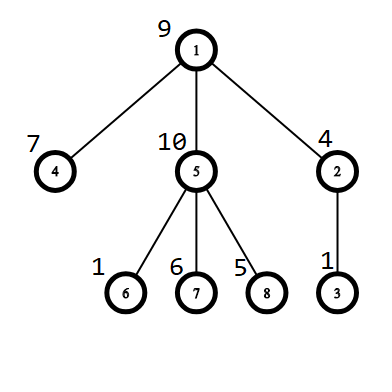


You can choose the vertex $$$3$$$ as a root, then the answer will be $$$2 \cdot 9 + 1 \cdot 4 + 0 \cdot 1 + 3 \cdot 7 + 3 \cdot 10 + 4 \cdot 1 + 4 \cdot 6 + 4 \cdot 5 = 18 + 4 + 0 + 21 + 30 + 4 + 24 + 20 = 121$$$.
In the second example tree consists only of one vertex so the answer is always $$$0$$$.

🧪 TEST CASES: 65 available
----------------------------------------
Example - Input: 8
9 4 1 7 10 1 6 5
1 2
2 3
1 4
1 5
5 6
5 7
5 8

Example - Output: 121



In [ ]:
# Select a problem to work with
# =====================================
PROBLEM_INDEX = 6  # Change this to select different problems (0-263)
# =====================================

selected_problem = display_problem(problems, PROBLEM_INDEX)

In [ ]:
def generate_prompt(problem):
    """Generate prompt following MMCode's format"""
    prompt = "\nQUESTION:\n"
    prompt += problem["question"]
    starter_code = problem["starter_code"] if len(problem.get("starter_code", [])) > 0 else None
    try:
        input_output = json.loads(problem["input_output"])
        fn_name = None if not input_output.get("fn_name") else input_output["fn_name"]
    except ValueError:
        fn_name = None

    if (not fn_name) and (not starter_code):
        call_format = "\nPlease write your code using Standard IO, i.e. input() and print()."
        prompt += call_format
    else:
        call_format = "\nPlease write your code using Call-Based format."
        prompt += call_format

    if starter_code:
        prompt += "\nThe starter code is provided as below. Please finish the code.\n" + starter_code + "\n"

    prompt += "\nANSWER:\n"
    return prompt

def solve_mmcode_problem(problem):
    """Solve an MMCode problem using Qwen3-VL with correct image interleaving"""
    if not problem:
        return "No problem selected."
    
    # Generate prompt following MMCode format
    prompt = (
        "You are required to solve a programming problem. "
        + "Please enclose your code inside a ```python``` block. "
        + " Do not write a main() function. If Call-Based format is used, return the result in an appropriate place instead of printing it.\n\n"
        + generate_prompt(problem)
    )
    
    # Convert all images to base64 (images are guaranteed to exist)
    base64_images = []
    for pil_image in problem['images']:
        buffered = BytesIO()
        pil_image.save(buffered, format="PNG")
        img_base64 = base64.b64encode(buffered.getvalue()).decode()
        base64_images.append(img_base64)

    interleaved_messages = []
    
    # Split the prompt and interleave text and images (following MMCode's approach)
    import re
    segments = re.split(r"!\[image\]\(.*?\)", prompt)
    for i, segment in enumerate(segments):
        # Text
        if len(segment) > 0:
            interleaved_messages.append({"type": "text", "text": segment})
        # Image
        if i < len(base64_images):
            interleaved_messages.append(
                {
                    "type": "image_url",
                    "image_url": {
                        "url": f"data:image/png;base64,{base64_images[i]}",
                    },
                }
            )
    
    try:
        response = client.chat.completions.create(
            model="pre-qwen3vl-235A22-instruct-0918-model",
            messages=[
                {
                    "role": "system",
                    "content": [
                        {
                            "type": "text",
                            "text": "You are a professional programming contester trying to solve algorithmic problems. The problems come with a description and some images, and you should write a Python solution.",
                        }
                    ],
                },
                {"role": "user", "content": interleaved_messages},
            ],
            max_tokens=16384,
            temperature=0.1
        )
        raw_response = response.choices[0].message.content
        code = extract_last_code_block(raw_response)
        if code is None:
            raise ValueError("No code block found in the response.")
        return code
    except Exception as e:
        return f"Error generating solution: {e}"

# Generate solution for the selected problem
print("\n🔄 Generating solution...")
solution_code = solve_mmcode_problem(selected_problem)
print("\n" + "="*50)
print("🤖 GENERATED SOLUTION:")
print("="*50)
print(solution_code)

# Save solution to solution.txt
with open("solution.txt", "w") as f:
    f.write(solution_code)


🔄 Generating solution...

🤖 GENERATED SOLUTION:
import sys
sys.setrecursionlimit(300000)

n = int(input())
a = list(map(int, input().split()))

if n == 1:
    print(0)
else:
    # Build adjacency list
    adj = [[] for _ in range(n)]
    for _ in range(n - 1):
        u, v = map(int, input().split())
        u -= 1  # Convert to 0-indexed
        v -= 1
        adj[u].append(v)
        adj[v].append(u)
    
    # Arrays to store results
    subtree_sum = [0] * n  # Sum of a[i] in subtree rooted at i
    cost = [0] * n  # Cost when vertex i is chosen as root
    
    # First DFS: Calculate cost for root (vertex 0) and subtree sums
    def dfs1(u, p, depth):
        subtree_sum[u] = a[u]
        cost[0] += depth * a[u]  # Cost for root (vertex 0)
        
        for v in adj[u]:
            if v != p:
                dfs1(v, u, depth + 1)
                subtree_sum[u] += subtree_sum[v]
    
    # Second DFS: Reroot the tree to calculate cost for each vertex
    def dfs2(u, p):
       

In [ ]:
# =====================================
ALLOW_EXTERNAL_EXECUTION = False # Set to True to enable execution
# =====================================
if not ALLOW_EXTERNAL_EXECUTION:
    raise RuntimeError("Execution of generated code is disabled for safety. Set ALLOW_EXTERNAL_EXECUTION = True to enable.")


# Test the generated solution using real MMCode evaluation
if selected_problem and solution_code:
    # Call test_mmcode.py to run the evaluation outside the notebook context to avoid problems
    os.system(f"python utils/multimodal_coding/test_mmcode.py --problem_index {PROBLEM_INDEX} --solution_file solution.txt")
else:
    print("No solution to evaluate.")

/cpfs02/users/likaixin/projects/3vl-demo/mmcode_test.jsonl.gz
✅ Loaded 263 problems
263

🧪 TESTING SOLUTION with MMCode framework:
--------------------------------------------------
📝 Testing code...
start = 18:50:37.850957
loaded input_output = 18:50:37.851107
loading test code = 18:50:37.851115
sol = import sys
import time
import itertools
from itertools import accumulate, product, permutations, combinations
import collections
from collections import Counter, OrderedDict, deque, defaultdict, ChainMap
from functools import lru_cache
import math
from math import sqrt, sin, cos, tan, ceil, fabs, floor, gcd, exp, log, log2
import fractions
from typing import List, Tuple
import numpy as np
import random
import heapq
from heapq import *
import sys
stdin = sys.stdin
stdout = sys.stdout
def code():
	sys.setrecursionlimit(300000)
	
	n = int(input())
	a = list(map(int, input().split()))
	
	if n == 1:
	    print(0)
	else:
	    # Build adjacency list
	    adj = [[] for _ in range(n)]
	    for _ 

The Qwen3-VL-235B-A22B-Instruct model achieves an accuracy of ~37.6% on the MMCode test set.